# Problem Statement

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Predict : Can you accurately predict insurance costs?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# shapes and columns of data set
print("Rows and columns in the dataset: ", df.shape)
print("Column name:", df.columns)

Rows and columns in the dataset:  (1338, 7)
Column name: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


1338 rows and 7 columns

# Columns 

                                            
•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance


In [4]:
# function for identifying missing value 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

no null value presented in dataset

In [5]:
# types of the data
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

we have 2 int64 columns, 2 flot64 columns and 3 object columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


detailed information of columns in a single frame

In [7]:
# checking the unique value of each column and list it in a new frame
df.nunique().to_frame("No. of unique value")

,No. of unique value
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


three columns are continueous columns and others are categorical columns. Let's check it in detail form using value_counts function

In [8]:
# lets check the value count of each column

for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000  

1. Applicant Age between from 18 - 64.

2. Highest number of applicant is male.

3. Majority of applicant do not have dependent which means they are single.

4. very least people are smokers.

5. Applicants are from south east, south west, northeast and north west

6. Charges column is our label data and it is continue data and it is regression problem

In [9]:
# mix and max for getting minimum and maximum charges
print("Minimum charges: ", df["charges"].min())
print("Mximum charges: ", df["charges"].max())

Minimum charges:  1121.8739
Mximum charges:  63770.42801


In [10]:
#statistical analysis
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Here we only consider age and bmi columns bcs other two are categorical column and target columns. Lets see it in detail

1. No null value present

2. diffrents in mean and median, slightly right skewed but not much more.

3. differents in 3rd quartile and maximum, there is some outliers present in both columns.

In [11]:
# make a list for continueous column
df_conti = df[["age","bmi"]] # make a list as a continue variable

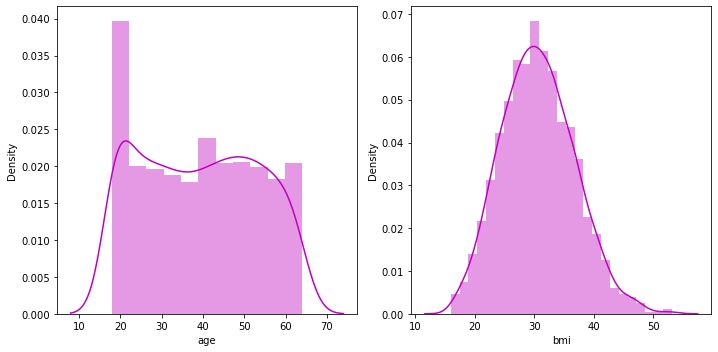

In [12]:
#Let's see the how data is distributed 
plt.figure(figsize=(15,5),facecolor='white')
plotnumber=1
for column in df_conti:
    if plotnumber<=20:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df_conti[column],color = "m")
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Here we can see that age column right skewed and bmi is normaly distributed

<AxesSubplot:xlabel='children', ylabel='count'>

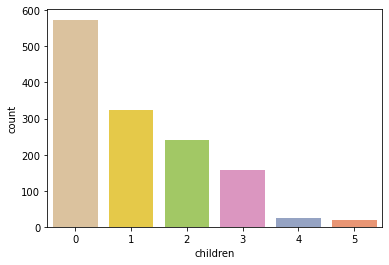

In [13]:
sns.countplot(x = "children", data = df,color = 'm',palette = 'Set2_r')

Based on the data, it can be observed that a majority of the applicants do not have any dependents

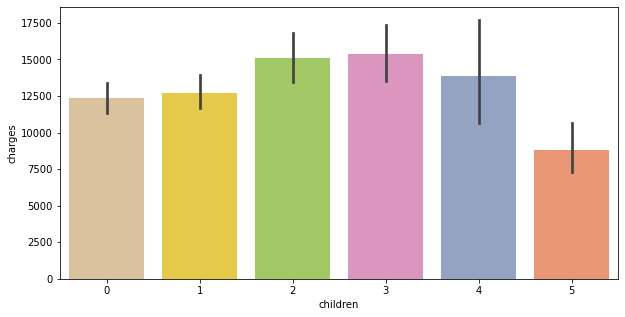

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x = "children", y = "charges", data = df,color = 'm',palette = 'Set2_r')
plt.show()

From the graph, we can observe that the majority of applicants have 2 to 3 dependents (spouse and kids), and it is evident that they are charged higher charges.

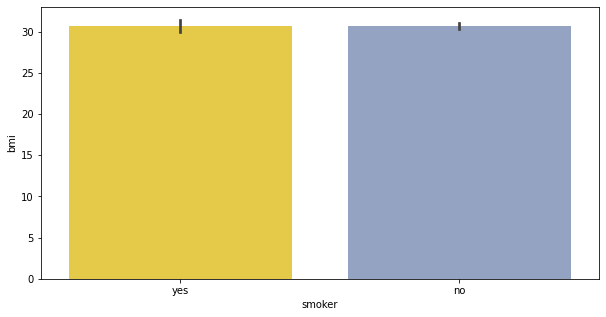

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x = "smoker", y = "bmi", data = df,color = 'm',palette = 'Set2_r')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

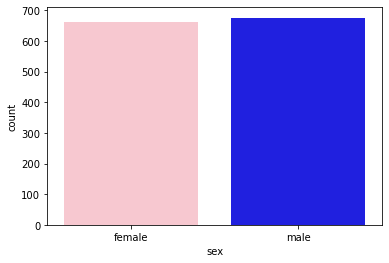

In [16]:
sns.countplot(x = "sex", data = df,color = 'm',palette =['pink','blue'] )

male and female are in equal proposition

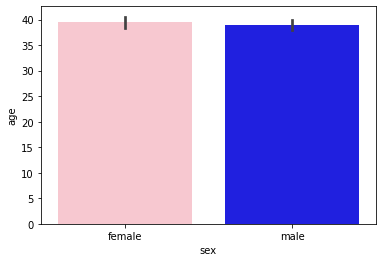

In [17]:
sns.barplot(x = "sex", y = "age", data = df,color = 'm',palette =['pink','blue'] )
plt.show()

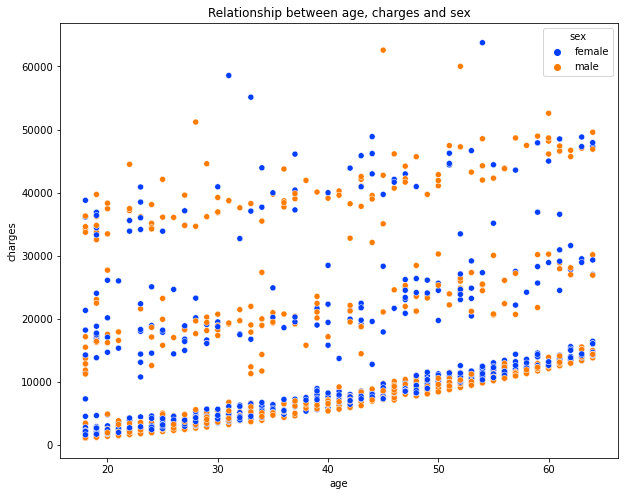

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="age", y="charges",hue= 'sex',data = df,palette='bright')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Relationship between age, charges and sex')
plt.show()


Here, we can observe that there is no perfect correlation between the target column and the other variables.

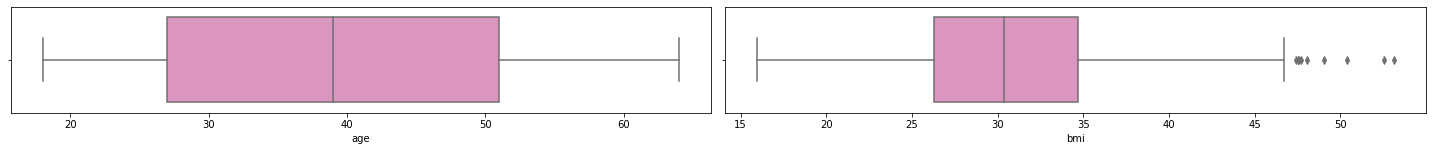

In [19]:
#Let's see the how data is distributed 
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in df_conti:
    if plotnumber<=20:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(df_conti[column],palette = 'Set2_r')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the graph we can see that bmi column has outliers

In [20]:
# checking skewness
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

here my threshold value is -/+ 0.5 and age and bmi columns are normaly distributed so it is symmetric. And children is categorical column and charges is our target column .

In [21]:
# encoding categorical column
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [22]:
# handle outliers
from scipy.stats import zscore

In [23]:
z = np.abs(df)
z.shape

(1338, 7)

In [24]:
threshold = 3
print (np.where(z>3))

(array([   0,    0,    0, ..., 1337, 1337, 1337], dtype=int64), array([0, 2, 6, ..., 0, 2, 6], dtype=int64))


In [25]:
# remove outlier using IQR method
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers
df1 = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]


In [26]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [27]:
print("rows and columns before removing outlier: ", df.shape)
print("rows and columns after removing outliers: ", df1.shape)

rows and columns before removing outlier:  (1338, 7)
rows and columns after removing outliers:  (1329, 7)


In [28]:
# Calculate percentage after removing outliers
percentage_after = (len(df1) / len(df)) * 100

# Calculate percentage before removing outliers
percentage_before = ((len(df) - len(df1)) / len(df)) * 100

# Print the percentages
print("Percentage of data retained after removing outliers: {:.2f}%".format(percentage_after))
print("Percentage of data removed as outliers: {:.2f}%".format(percentage_before))


Percentage of data retained after removing outliers: 99.33%
Percentage of data removed as outliers: 0.67%


so, when removing the outliers we loss less than 10% data 

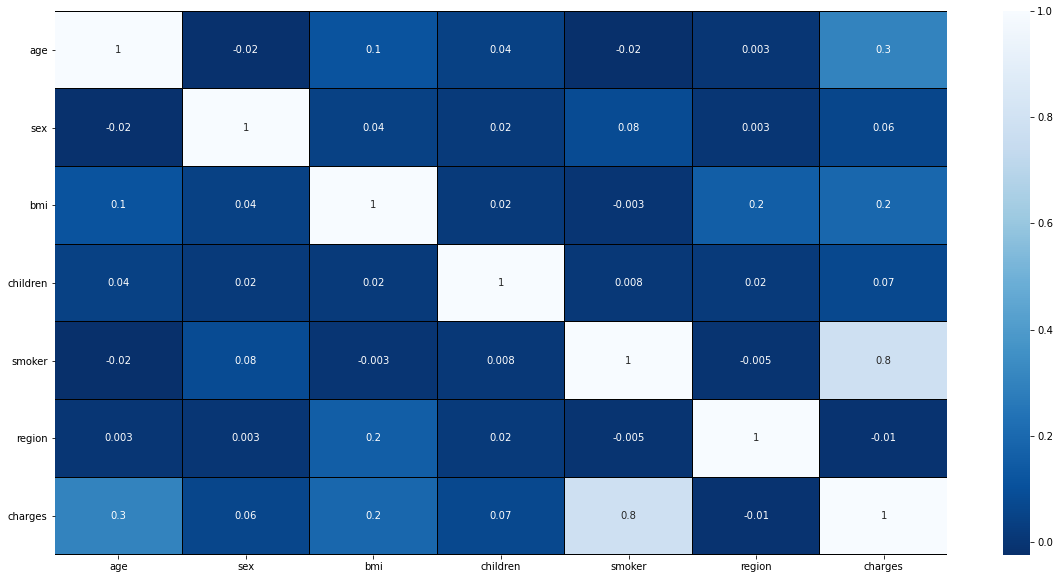

In [29]:
# visualise correlation with heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),linewidths = 0.1, fmt = '.1g', linecolor='black',annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

Here we can conclude that smokers and charges are highly correlated with each other and it is not a multycolinearity problem

In [30]:
df1.corr().charges.sort_values()

region     -0.010730
sex         0.063394
children    0.069739
bmi         0.193196
age         0.302022
smoker      0.785912
charges     1.000000
Name: charges, dtype: float64

In [31]:
# seperate the indipendent variable and target variable into x and y
x = df1.drop("charges",axis = 1)
y = df1["charges"]

print("Indipendent variables: ", x.shape)
print("target variable: ", y.shape)

Indipendent variables:  (1329, 6)
target variable:  (1329,)


In [32]:
# scaling the features usind satndardscaler for overcome the biasnes
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns= x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.008311,-0.445670,-0.907940,1.975869,1.344193
1,-1.509976,0.991757,0.546267,-0.079764,-0.506106,0.440128
2,-0.797855,0.991757,0.416149,1.576587,-0.506106,0.440128
3,-0.441794,0.991757,-1.323542,-0.907940,-0.506106,-0.463937
4,-0.513006,0.991757,-0.280065,-0.907940,-0.506106,-0.463937
...,...,...,...,...,...,...
1324,0.768813,0.991757,0.073111,1.576587,-0.506106,-0.463937
1325,-1.509976,-1.008311,0.233646,-0.907940,-0.506106,-1.368002
1326,-1.509976,-1.008311,1.066737,-0.907940,-0.506106,0.440128
1327,-1.296340,-1.008311,-0.800536,-0.907940,-0.506106,1.344193


# Modeling

In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN


In [34]:
# finding the best random state
maxAcc = 0
maxRs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRs = i
        
print("maximum r2_score is :", maxAcc, "Random_state is :", maxRs)

maximum r2_score is : 0.8122062068680821 Random_state is : 86


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=.30, random_state= maxRs)

In [36]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_lr= LR.predict(x_test)
pred_train = LR.predict(x_train)
print("r2_score: ", r2_score(y_test,pred_lr))
print("r2_score on training data: ", r2_score(y_train,pred_train)*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred_lr))
print("Mean squared error: ", mean_squared_error(y_test,pred_lr))
print("root mean squared error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

r2_score:  0.8122062068680821
r2_score on training data:  71.70870558090732
Mean absolute error:  4037.4174338743383
Mean squared error:  29649068.161672454
root mean squared error:  5445.095789944604


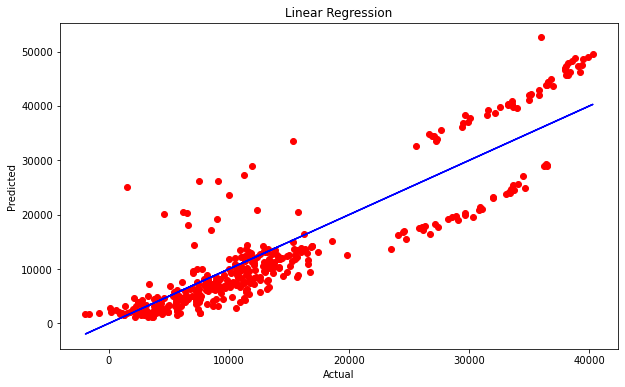

In [37]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_lr, y = y_test , color= 'r')
plt.plot(pred_lr,pred_lr,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

predicted value almost near the actual value but we can see the error

In [38]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
pred_train = rf.predict(x_train)
print("r2_score: ", r2_score(y_test,pred_rf))
print("r2_score on training data: ", r2_score(y_train,pred_train)*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred_rf))
print("Mean squared error: ", mean_squared_error(y_test,pred_rf))
print("root mean squared error: ", np.sqrt(mean_squared_error(y_test,pred_rf)))

r2_score:  0.8956247645246878
r2_score on training data:  97.0143649294459
Mean absolute error:  2374.1889266070184
Mean squared error:  16478864.500192972
root mean squared error:  4059.416768477089


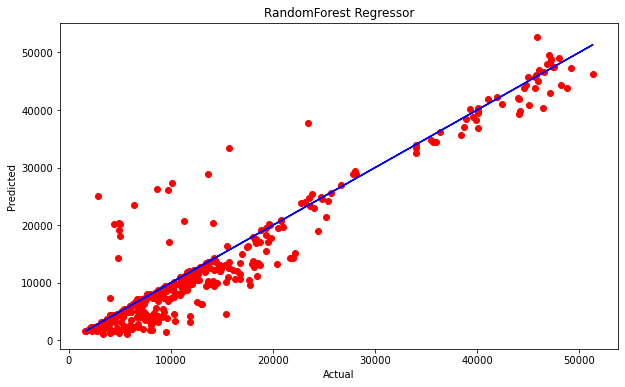

In [39]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_rf, y = y_test , color= 'r')
plt.plot(pred_rf,pred_rf,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RandomForest Regressor")
plt.show()

It is almost closer to actual value and few error compair to linear

In [40]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt= dt.predict(x_test)
pred_train = dt.predict(x_train)
print("r2_score: ", r2_score(y_test,pred_dt))
print("r2_score on training data: ", r2_score(y_train,pred_train)*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred_dt))
print("Mean squared error: ", mean_squared_error(y_test,pred_dt))
print("root mean squared error: ", np.sqrt(mean_squared_error(y_test,pred_dt)))

r2_score:  0.7998744967112678
r2_score on training data:  99.79601720667308
Mean absolute error:  2525.171841350877
Mean squared error:  31596010.650514666
root mean squared error:  5621.032881109544


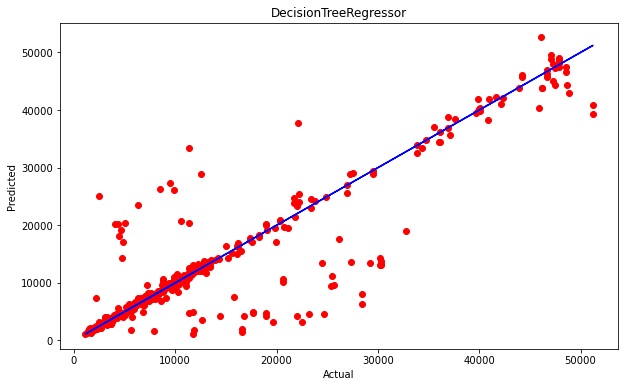

In [41]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_dt, y = y_test , color= 'r')
plt.plot(pred_dt,pred_dt,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("DecisionTreeRegressor")
plt.show()

In [42]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print("r2_score: ", r2_score(y_test,pred_knn))
print("r2_score on training data: ", r2_score(y_train,pred_train)*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred_knn))
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
print("root mean squared error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score:  0.8718082478059669
r2_score on training data:  84.72465313960905
Mean absolute error:  2889.512681922306
Mean squared error:  20239039.508058816
root mean squared error:  4498.782002726829


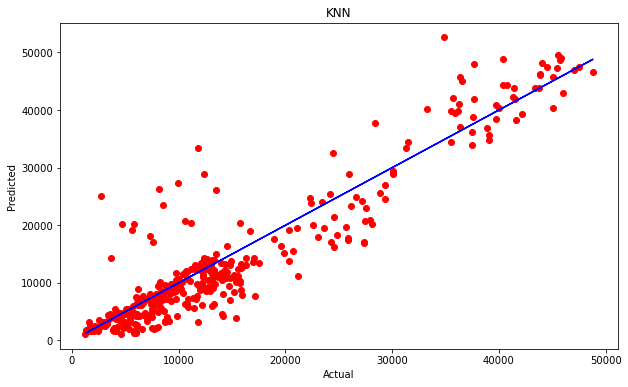

In [43]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_knn, y = y_test , color= 'r')
plt.plot(pred_knn,pred_knn,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN")
plt.show()

In [44]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb= gb.predict(x_test)
pred_train = gb.predict(x_train)
print("r2_score: ", r2_score(y_test,pred_gb))
print("r2_score on training data: ", r2_score(y_train,pred_train)*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred_gb))
print("Mean squared error: ", mean_squared_error(y_test,pred_gb))
print("root mean squared error: ", np.sqrt(mean_squared_error(y_test,pred_gb)))

r2_score:  0.9187302193284302
r2_score on training data:  88.32028327123203
Mean absolute error:  2153.27772322627
Mean squared error:  12830952.64454725
root mean squared error:  3582.031915623764


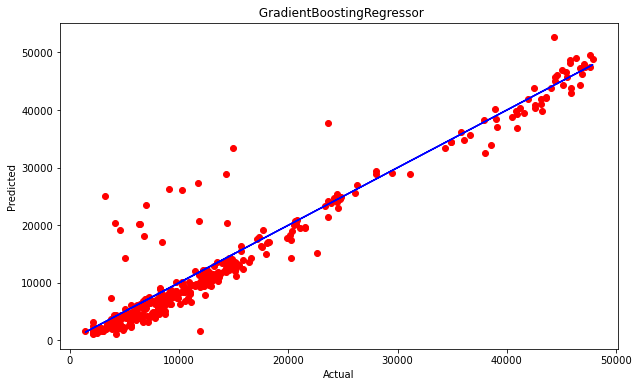

In [45]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_gb, y = y_test , color= 'r')
plt.plot(pred_gb,pred_gb,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(" GradientBoostingRegressor")
plt.show()

In [46]:
ls = Lasso()
ls.fit(x_train,y_train)
pred_ls = ls.predict(x_test)
pred_train = ls.predict(x_train)
print("r2_score: ", r2_score(y_test,pred_ls))
print("r2_score on training data: ", r2_score(y_train,pred_train)*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred_ls))
print("Mean squared error: ", mean_squared_error(y_test,pred_ls))
print("root mean squared error: ", np.sqrt(mean_squared_error(y_test,pred_ls)))

r2_score:  0.8122193398405504
r2_score on training data:  71.70870086840783
Mean absolute error:  4037.149238786982
Mean squared error:  29646994.715104353
root mean squared error:  5444.905390831355


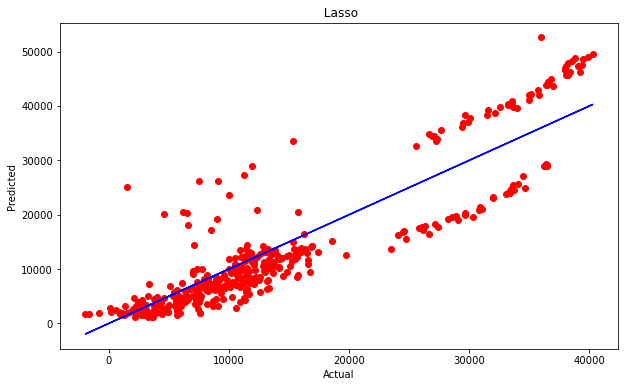

In [47]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_ls, y = y_test , color= 'r')
plt.plot(pred_ls,pred_ls,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(" Lasso")
plt.show()

In [48]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print("r2_score: ", r2_score(y_test,pred_rd))
print("r2_score on training data: ", r2_score(y_train,pred_train)*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred_rd))
print("Mean squared error: ", mean_squared_error(y_test,pred_rd))
print("root mean squared error: ", np.sqrt(mean_squared_error(y_test,pred_rd)))

r2_score:  0.8121174885479463
r2_score on training data:  71.70861317653359
Mean absolute error:  4039.2435715138067
Mean squared error:  29663075.097029723
root mean squared error:  5446.381835405017


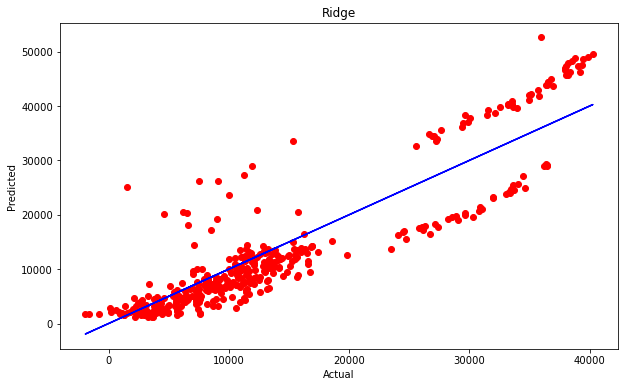

In [49]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_rd, y = y_test , color= 'r')
plt.plot(pred_rd,pred_rd,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge")
plt.show()

# cross validation

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
score = cross_val_score(LR,x,y)
print(score)
print("cross validation score of LR is: ", score.mean())
print("r2_score: ", r2_score(y_test,pred_lr))
print("difference b/w r2_score and cross validation score: ",(r2_score(y_test,pred_lr) - score.mean())*100)

[0.76260833 0.71182049 0.77313952 0.72863069 0.75664946]
cross validation score of LR is:  0.7465696971497523
r2_score:  0.8122062068680821
difference b/w r2_score and cross validation score:  6.563650971832979


In [52]:
score = cross_val_score(rf,x,y)
print(score)
print("cross validation score of rf is: ", score.mean())
print("r2_score: ", r2_score(y_test,pred_rf))
print("difference b/w r2_score and cross validation score: ",(r2_score(y_test,pred_rf) - score.mean())*100)

[0.85296473 0.77404017 0.86626139 0.82547893 0.85289937]
cross validation score of rf is:  0.8343289190651942
r2_score:  0.8956247645246878
difference b/w r2_score and cross validation score:  6.129584545949351


In [53]:
score = cross_val_score(dt,x,y)
print(score)
print("cross validation score of dt is: ", score.mean())
print("r2_score: ", r2_score(y_test,pred_dt))
print("difference b/w r2_score and cross validation score: ",(r2_score(y_test,pred_dt) - score.mean())*100)

[0.75028382 0.68589016 0.71784844 0.69596507 0.68466313]
cross validation score of dt is:  0.7069301243919364
r2_score:  0.7998744967112678
difference b/w r2_score and cross validation score:  9.29443723193314


In [54]:
score = cross_val_score(knn,x,y)
print(score)
print("cross validation score of knn is: ", score.mean())
print("r2_score: ", r2_score(y_test,pred_knn))
print("difference b/w r2_score and cross validation score: ",(r2_score(y_test,pred_knn) - score.mean())*100)

[0.82416751 0.75474383 0.83486583 0.79767075 0.80754954]
cross validation score of knn is:  0.8037994912119608
r2_score:  0.8718082478059669
difference b/w r2_score and cross validation score:  6.800875659400607


In [55]:
score = cross_val_score(gb,x,y)
print(score)
print("cross validation score of gb is: ", score.mean())
print("r2_score: ", r2_score(y_test,pred_gb))
print("difference b/w r2_score and cross validation score: ",(r2_score(y_test,pred_gb) - score.mean())*100)

[0.87608263 0.79293932 0.88889032 0.84505412 0.86049384]
cross validation score of gb is:  0.8526920484412912
r2_score:  0.9187302193284302
difference b/w r2_score and cross validation score:  6.603817088713903


In [56]:
score = cross_val_score(ls,x,y)
print(score)
print("cross validation score of lasso is: ", score.mean())
print("r2_score: ", r2_score(y_test,pred_ls))
print("difference b/w r2_score and cross validation score: ",(r2_score(y_test,pred_ls) - score.mean())*100)

[0.7626132  0.71184884 0.77312553 0.72863003 0.7566523 ]
cross validation score of lasso is:  0.7465739806748187
r2_score:  0.8122193398405504
difference b/w r2_score and cross validation score:  6.564535916573167


In [57]:
score = cross_val_score(rd,x,y)
print(score)
print("cross validation score of ridge is: ", score.mean())
print("r2_score: ", r2_score(y_test,pred_rd))
print("difference b/w r2_score and cross validation score: ",(r2_score(y_test,pred_rd) - score.mean())*100)

[0.76260288 0.71191263 0.77304715 0.72869326 0.75660969]
cross validation score of ridge is:  0.7465731221831348
r2_score:  0.8121174885479463
difference b/w r2_score and cross validation score:  6.554436636481153


conclusion: when comparing all the model with cross validation, there slight different but there is no chances for over and under fitting. Finally, my best model is GradianboostingRegressor

In [66]:
# hyper parameter tuning using GridSearchCV
parameters = {'loss': ['ls', 'lad'],
             'learning_rate': [0.1, 0.01, 0.001],
             'n_estimators': [100, 200, 500]}

In [67]:
gcv=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['ls', 'lad'],
                         'n_estimators': [100, 200, 500]})

In [68]:
# getting best parameter 
gcv.best_params_

{'learning_rate': 0.01, 'loss': 'ls', 'n_estimators': 500}

In [70]:
model = GradientBoostingRegressor(learning_rate = 0.01, loss = 'ls', n_estimators = 500)# apply the best parameter
model.fit(x_train,y_train)
pred= model.predict(x_test)
print("r2_score: ", r2_score(y_test,pred))
print("Mean absolute error: ", mean_absolute_error(y_test,pred))
print("Mean squared error: ", mean_squared_error(y_test,pred))
print("root mean squared error: ", np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  0.9232332934675664
Mean absolute error:  2131.615989793049
Mean squared error:  12120002.884911029
root mean squared error:  3481.379451440338


r2_score increase from 91 to 92

In [71]:
# save model
import pickle
pickle.dump(model,open("medical insurance.pkl","wb"))

In [72]:
# loading the saved model
load_model = pickle.load(open("medical insurance.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

92.32332934675665


In [73]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index = ['predict','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
predict,5723.139941,44108.44399,18897.753847,42057.321612,8347.270859,20665.297344,14423.583983,7162.627262,4230.695945,12288.05777,...,18197.935639,14441.275258,14552.20334,46429.331951,5967.102929,2960.915415,5668.835916,26287.340813,42373.510007,14055.840827
original,4005.422500,46889.26120,19023.260000,40419.019100,6079.671500,20773.627750,12646.207000,18157.876000,7323.734819,10560.49170,...,17178.682400,13462.520000,12233.82800,44400.406400,4931.647000,3260.199000,5488.262000,27037.914100,43896.376300,11987.168200
